In [1]:
from rdkit import Chem

In [43]:
def iterate_molecule(neighbors, visited, traj, length):
    """Recursive function to iterate neighbors of a currently visited oxygen atom. Finds oxygen neighbors and attaches thoses to a trajectory.

    Args:
        neighbors (list): Neighbors of the currently visited oxygen atom.
        visited (set): Previously visited oxygen atoms.
        traj (set): Trajectory containing atom indexes of the currently discovered oxygen chain.
        length (int): Current trajectory length

    Returns:
        traj (set): Trajectory containing atom indexes of the currently discovered oxygen chain.
        visited (set): Previously visited oxygen atoms
        length (int): Current trajectory length
    """
    for neighbor in neighbors:
        if neighbor.GetAtomicNum() != 8 or neighbor.GetIdx() in visited:
            continue
        visited.add(neighbor.GetIdx())
        traj.add(neighbor.GetIdx())
        length += 1
        traj, visited, length = iterate_molecule(neighbor.GetNeighbors(), visited,traj,length)
    return traj, visited, length

In [47]:
def okygen_chains(smiles):
    mol = Chem.MolFromSmiles(smiles)
    visited = set()
    trajs = []
    lengths = {}
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() != 8 or atom.GetIdx() in visited:
            continue
        visited.add(atom.GetIdx())
        neighbors = atom.GetNeighbors()
        traj = {atom.GetIdx()}
        length = 1
        traj, visited, length  = iterate_molecule(neighbors,visited, traj, length)

        trajs.append(traj)
        if length in lengths.keys():
            lengths[length] += 1
        else:
            lengths[length] = 1
    return trajs,lengths


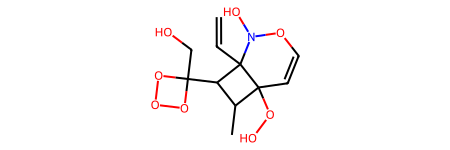

In [48]:
smiles="C=CC12C(C3(CO)OOO3)C(C)C1(OO)C=CON2O"
Chem.MolFromSmiles(smiles)

In [49]:
okygen_chains(smiles)

([{6}, {7, 8, 9}, {13, 14}, {17}, {19}], {1: 3, 3: 1, 2: 1})

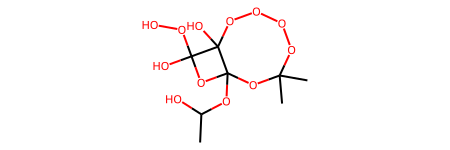

In [50]:
smiles="CC(O)OC12OC(C)(C)OOOOC1(O)C(O)(OO)O2"
Chem.MolFromSmiles(smiles)

In [80]:
Chem.MolFromSmiles("CC12[C]C34C5C67CC89C%10%11C%12C16C1C6C52C32C6%10C%11C48C92C1%127")
Chem.SanitizeMol(Chem.MolFromSmiles("CC12[C]C34C5C67CC89C%10%11C%12C16C1C6C52C32C6%10C%11C48C92C1%127"))

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [79]:
Chem.MolFromSmiles("CC12[C]C34C5C67CC89C%10%11C%12C16C1C6C52C32C6%10C%11C48C92C1%127").GetRingInfo().NumRings()

0

In [82]:
!pip install selfies


[notice] A new release of pip available: 22.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
import selfies as sf

# SMILES → SELFIES
smiles = "CC12[C]C34C5C67CC89C%10%11C%12C16C1C6C52C32C6%10C%11C48C92C1%127"
selfie = sf.encoder(smiles)
print("SELFIES:", selfie)

SELFIES: [C][C][CH0][C][C][C][C][C][C][C][C][Ring1][#Branch2][Ring1][=Branch1][C][C][C][Ring1][#Branch2][Ring1][=N][C][Ring1][N][C][Ring1][Ring2][Ring1][Branch2][C][Ring1][=Branch2][C][Ring1][#C][Ring1][O][C][Ring1][N][Ring1][Branch1][C][Ring1][=Branch2][Ring1][O][Ring1][#C]


In [85]:
from gflownet.utils import sascore

In [87]:
sascore.calculateScore(Chem.MolFromSmiles("CC12[C]C34C5C67CC89C%10%11C%12C16C1C6C52C32C6%10C%11C48C92C1%127"))

8.969095062285014

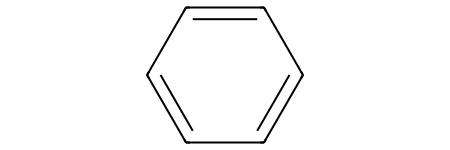

In [98]:
Chem.MolFromSmiles("C1=CC=CC=C1")

In [99]:
sascore.calculateScore(Chem.MolFromSmiles("C1=CC=CC=C1"))

1.0

In [100]:
import numpy as np
import matplotlib.pyplot as plt

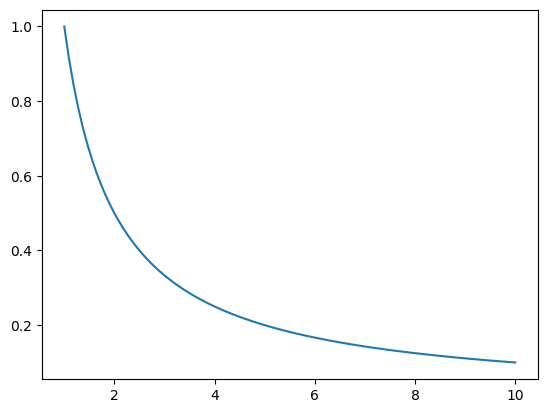

In [101]:
x = np.linspace(1,10,100)
plt.plot(x, 1/x)

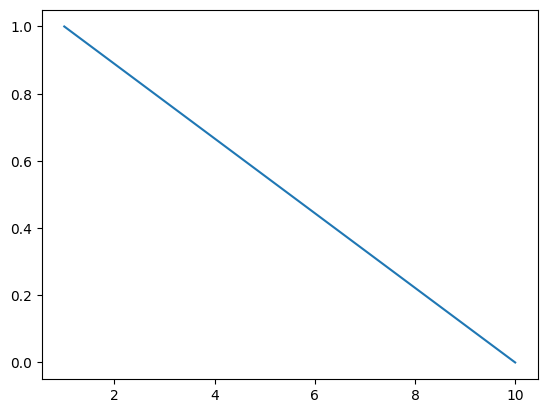

In [102]:
plt.plot(x, (10 - x) / 9)

In [51]:
okygen_chains(smiles)

([{2}, {3}, {5}, {9, 10, 11, 12}, {14}, {16}, {17, 18}, {19}],
 {1: 6, 4: 1, 2: 1})

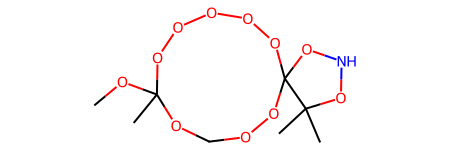

In [70]:
smiles="COC1(C)OCOOC2(ONOC2(C)C)OOOOO1"
Chem.MolFromSmiles(smiles)

In [71]:
okygen_chains(smiles)

([{1}, {4}, {6, 7}, {9}, {11}, {15, 16, 17, 18, 19}], {1: 4, 2: 1, 5: 1})

In [52]:
import pandas as pd

In [53]:
openpom_smiles = pd.read_csv("openpomdata.csv")["nonStereoSMILES"]
openpom_smiles_to_mol = {s: Chem.MolFromSmiles(s) for s in openpom_smiles}

In [108]:
df = pd.read_csv("openpomdata.csv")
df = df[df['odorless'] == False]

In [109]:

atoms_in_dataset = set()

for smiles in df["nonStereoSMILES"]:  # or your SMILES column
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        atoms_in_dataset.update(atom.GetSymbol() for atom in mol.GetAtoms())

In [110]:
atoms_in_dataset

{'Br', 'C', 'Cl', 'F', 'Fe', 'N', 'Na', 'O', 'S'}

In [116]:

exh_in_dataset = set()

for smiles in df["nonStereoSMILES"]:  # or your SMILES column
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        sset = {atom.GetNumExplicitHs() for atom in mol.GetAtoms()}
        if 1 in sset or 4 in sset:
            print(smiles, sset)
        exh_in_dataset.update(sset)

c1ccc2[nH]ccc2c1 {0, 1}
Cc1c[nH]c2ccccc12 {0, 1}
Cc1cc2ccccc2[nH]1 {0, 1}
c1cc[nH]c1 {0, 1}
O=Cc1ccc[nH]1 {0, 1}
CC(=O)c1ccc[nH]1 {0, 1}
CCC(=O)c1ccc[nH]1 {0, 1}
CCCC(CCOC)[SH]=C(O)OCC {0, 1}
Cn1cnc2c1c(=O)[nH]c(=O)n2C {0, 1}
O=c1cccc[nH]1 {0, 1}
Cc1ccc(C)[nH]1 {0, 1}
Cc1ccc(C=O)[nH]1 {0, 1}
S=c1[nH]c2ccccc2s1 {0, 1}
O=C(CSCc1nc2ccccc2[nH]1)Nc1ccc2ccccc2c1 {0, 1}
O=C(CCc1ccccc1)c1ccc[nH]1 {0, 1}
CC(=O)Cc1ccc[nH]1 {0, 1}
c1ccc(CCCc2ccn[nH]2)cc1 {0, 1}
[NH4+].[NH4+].[S-2] {0, 4}
CC(CC=O)CCCC(C)(C)O.Cc1c[nH]c2ccccc12 {0, 1}
CC(CC=O)CCCC(C)(C)O.c1ccc2[nH]ccc2c1 {0, 1}
S=c1nccc[nH]1 {0, 1}
C[NH+]1CCN(c2ccc(CO)cc2)CC1 {0, 1}
CC1=[NH+]C(C)OC1C {0, 1}
CC(=O)c1ccc(C)[nH]1 {0, 1}


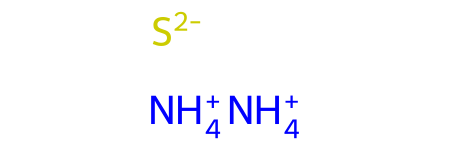

In [117]:
Chem.MolFromSmiles("[NH4+].[NH4+].[S-2]")

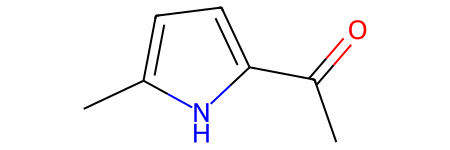

In [119]:
Chem.MolFromSmiles("CC(=O)c1ccc(C)[nH]1")


In [122]:
def is_valid_smiles(smiles: str) -> bool:
    mol = Chem.MolFromSmiles(smiles)
    if not mol:
        return False 
    for atom in mol.GetAtoms():
        if atom.GetNumExplicitHs() > 1:
            return False  
    return True

df_valid = df[df["nonStereoSMILES"].apply(is_valid_smiles)].copy()  
len(df_valid), len(df)

(4782, 4783)

In [114]:
exh_in_dataset

{0, 1, 4}

In [111]:
df.keys()

Index(['nonStereoSMILES', 'descriptors', 'alcoholic', 'aldehydic',
       'alliaceous', 'almond', 'amber', 'animal', 'anisic', 'apple',
       ...
       'tropical', 'vanilla', 'vegetable', 'vetiver', 'violet', 'warm', 'waxy',
       'weedy', 'winey', 'woody'],
      dtype='object', length=140)

In [56]:
oxygen_dicts = [okygen_chains(s)[1] for s in openpom_smiles]

In [57]:
{ k: sum(d.get(k, 0) for d in oxygen_dicts) for k in set().union(*oxygen_dicts) }

{1: 9030, 2: 3}

In [58]:
def count_oxygen(smiles):
    mol = Chem.MolFromSmiles(smiles)
    count = 0
    for atom in mol.GetAtoms():
        if atom.GetAtomicNum() != 8:
            continue
        count +=1
    return count
    

In [59]:
oxygen_counts = [count_oxygen(s) for s in openpom_smiles]

In [68]:
large_o = []
length_M = []
for s in openpom_smiles:
    c = count_oxygen(s)
    if c >5:
        large_o.append(s)
        length_M.append(len(Chem.MolFromSmiles(s).GetAtoms()))
        if len(Chem.MolFromSmiles(s).GetAtoms()) == 8:
            print(s)
len(large_o), min(length_M)

O.O.O=S(=O)([O-])[O-].[Ca+2]


(113, 8)

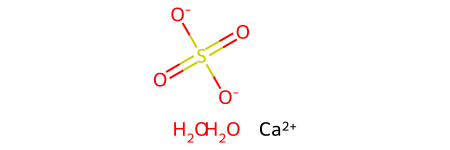

In [69]:
Chem.MolFromSmiles("O.O.O=S(=O)([O-])[O-].[Ca+2]")

In [60]:
import matplotlib.pyplot as plt

(array([6.380e+02, 0.000e+00, 1.488e+03, 0.000e+00, 0.000e+00, 1.992e+03,
        0.000e+00, 5.120e+02, 0.000e+00, 0.000e+00, 2.010e+02, 0.000e+00,
        3.900e+01, 0.000e+00, 0.000e+00, 4.400e+01, 0.000e+00, 1.500e+01,
        0.000e+00, 0.000e+00, 2.000e+01, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 5.000e+00, 0.000e+00, 5.000e+00, 0.000e+00, 0.000e+00,
        4.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

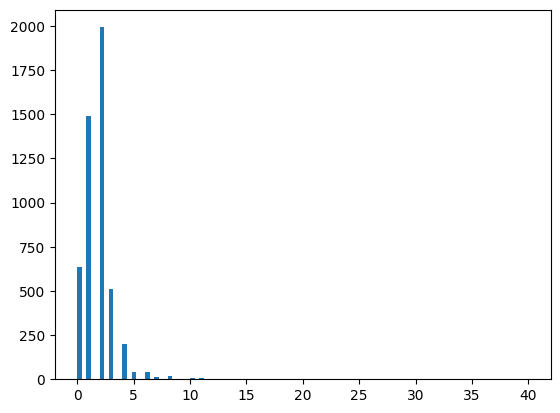

In [63]:
plt.hist(oxygen_counts, bins=100)

In [35]:
a_dict = {"a":10,"b":2,"c":4}
b_dict = {"a":11,"b":2}
{k: a_dict.get(k, 0) + b_dict.get(k, 0) for k in a_dict.keys() | b_dict.keys()}

{'c': 4, 'a': 21, 'b': 4}

In [36]:
dicts = [a_dict,b_dict]
{ k: sum(d.get(k, 0) for d in dicts) for k in set().union(*dicts) }

{'a': 21, 'b': 4, 'c': 4}